In [1]:
# Import the required libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import pylab
import copy


# Import the data
df_base = pd.read_csv('/Users/jorrimprins/Google Drive/MSc Econometrics/Data Mining Techniques/Assignment 1/Data/dataset_mood_smartphone.csv')
df_base = df_base.drop('Unnamed: 0', 1)
df_base.loc[:,('time')] = pd.to_datetime(df_base.time)

# Create variables for the unique variables & ids used in the research
score_variables = df_base.variable.unique()[0:3]
other_variables = df_base.variable.unique()[3:]
all_variables = df_base.variable.unique()
ids = df_base.id.unique()
dates = pd.date_range(start=df_base.time.min().round('D'), end=df_base.time.max().round('D'), freq='D')

## Displaying the data in a more suitable fashion

In [2]:
# First, create a new dataframe dat has multiple indices
df = pd.DataFrame(np.nan,
                    index = pd.MultiIndex.from_product([df_base.id.unique(),dates], names = ["ID", "time"]),
                    columns= df_base.variable.unique())

In [3]:
# Thereafter, we will fill the aformentioned DataFrame with the restructured values
count = 0;
print('This may take a while, right now we finished:')
for i in ids:
    id_used = df_base[df_base.id == i]
    id_used.index = id_used.time
    
    for j in score_variables:
        sub_df = id_used[id_used.variable == j].value.resample('D').mean()
        used_dates = np.array(sub_df.index.strftime('%Y-%m-%d'))
        for k in used_dates:
            df.loc[i, j].loc[k] = sub_df[k]
            
    for j in other_variables:
        sub_df = id_used[id_used.variable == j].value.resample('D').sum()
        used_dates = np.array(sub_df.index.strftime('%Y-%m-%d'))
        for k in used_dates:
            df.loc[i, j].loc[k] = sub_df[k]
            
    print(i)


This may take a while, right now we finished:
AS14.01
AS14.02
AS14.03
AS14.05
AS14.06
AS14.07
AS14.08
AS14.09
AS14.12
AS14.13
AS14.14
AS14.15
AS14.16
AS14.17
AS14.19
AS14.20
AS14.23
AS14.24
AS14.25
AS14.26
AS14.27
AS14.28
AS14.29
AS14.30
AS14.31
AS14.32
AS14.33


In [4]:
# Adding t column
df['t'] = np.nan
count = 0
for i in ids:
    count_days = 0
    for d in dates:
        count_days +=1
        df['t'][count] = count_days
        count += 1

# Descriptive statistics
After completing the pre-processing of the data, we want to get a better picture of what this data describes.
First, let's look at the number of individuals.

In [5]:
print(len(df.index.get_level_values(0).unique()))

27


Then, let's find out which features are used most frequent.

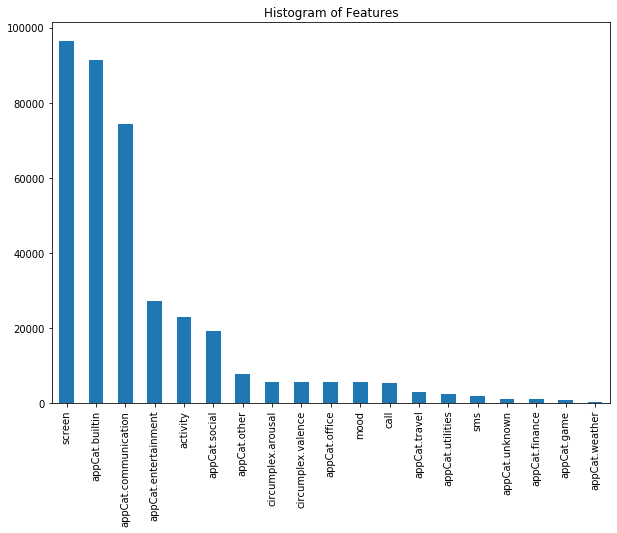

In [6]:
pd.DataFrame(df_base.variable.value_counts()).plot.bar(title="Histogram of Features", legend=None,figsize=(10,7));

## Histograms of all features

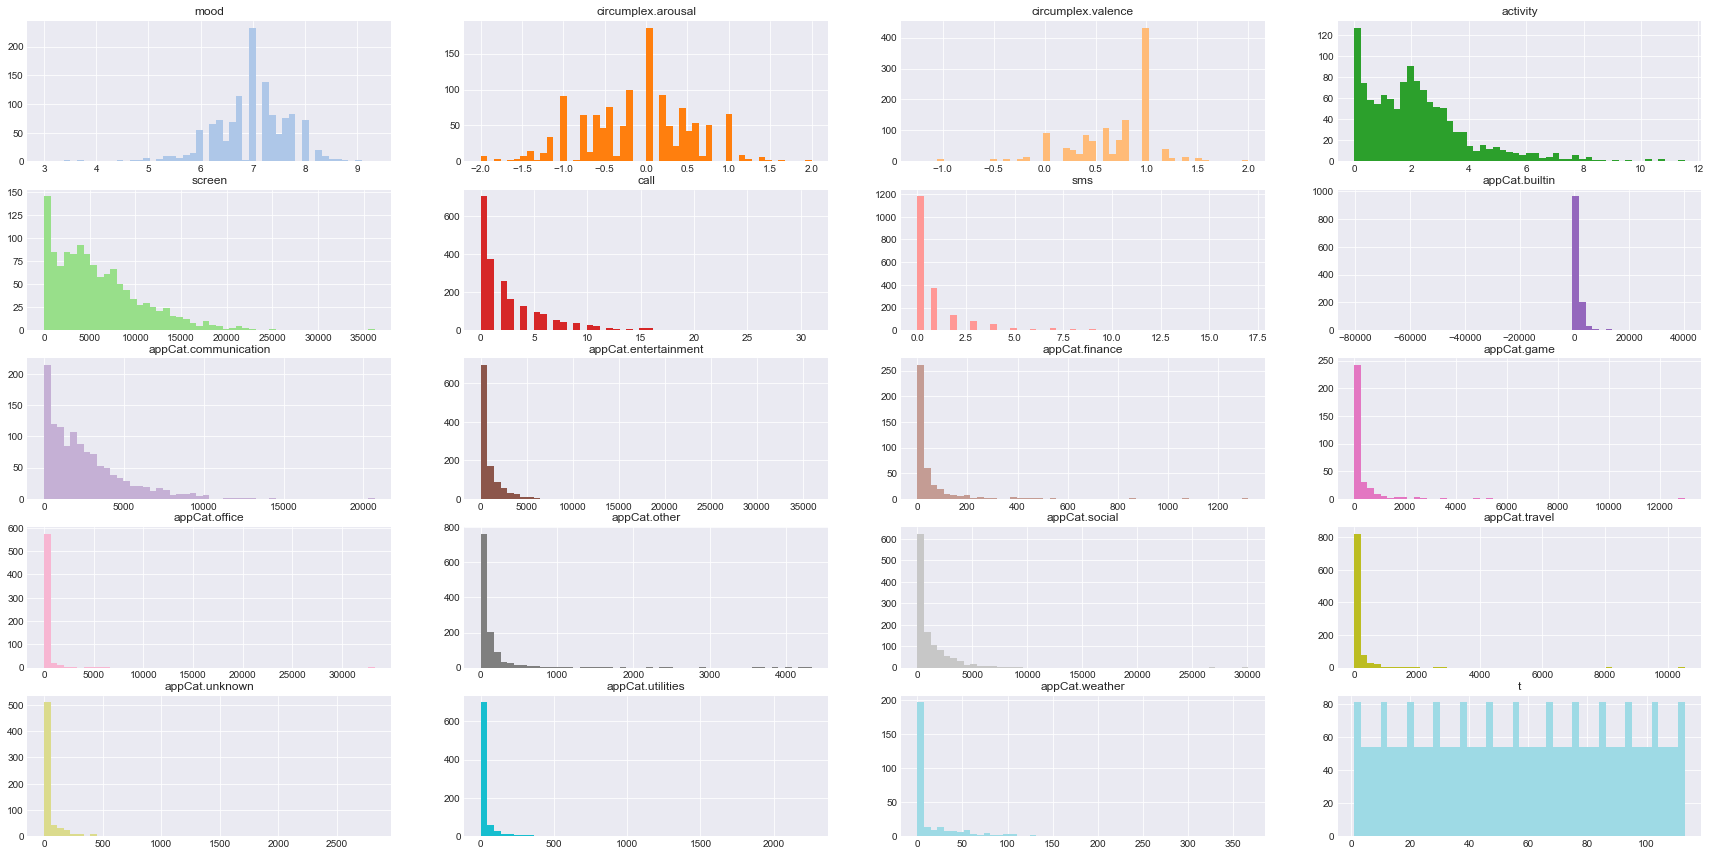

In [7]:
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('tab20')

num=1
f= plt.figure(figsize=(30,15))
for var in list(df.columns.array):
    ax = f.add_subplot(5,4,num)
    a = np.asarray(df[var].dropna())
    ax.hist(a, bins=50, color=palette(num))
    ax.set_title(var)
    num+=1

In [8]:
df.describe()

,mood,circumplex.arousal,circumplex.valence,activity,screen,call,sms,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,appCat.social,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather,t
count,1268.000000,1268.000000,1266.000000,1206.000000,1237.000000,2042.000000,1915.000000,1230.000000,1234.000000,1095.000000,418.000000,325.000000,617.000000,1200.000000,1167.000000,972.000000,652.000000,864.000000,292.000000,3051.00000
mean,6.990063,-0.103851,0.687112,2.208115,5881.748977,2.565622,0.938903,1375.870611,2608.916941,930.832901,48.871246,321.176563,206.466948,164.544101,1187.775905,133.899176,65.604713,53.359829,17.595623,57.00000
std,0.736465,0.662715,0.434602,1.795428,4731.232574,3.427109,1.869271,3793.920938,2474.806134,1764.672253,119.906806,940.003264,1440.458239,384.271423,1892.696108,501.508817,216.898841,173.967160,39.808478,32.62436
min,3.000000,-2.000000,-1.250000,0.000000,0.000000,0.000000,0.000000,-80367.930000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000
25%,6.600000,-0.600000,0.400000,0.857670,2261.391001,0.000000,0.000000,236.363000,746.281250,15.709500,0.000000,0.000000,0.000000,40.682500,68.987000,0.000000,0.000000,0.000000,0.000000,29.00000
50%,7.000000,0.000000,0.800000,1.941667,4942.536000,1.000000,0.000000,726.573000,1990.120000,364.104000,0.000000,48.879000,0.000000,61.490500,509.768000,0.000000,0.000000,1.002500,0.000000,57.00000
75%,7.500000,0.400000,1.000000,2.999004,8390.178000,4.000000,1.000000,1527.240000,3705.815500,1168.583500,49.358750,275.675000,51.786000,127.790000,1675.439500,121.350500,41.681750,26.567000,20.300500,85.00000
max,9.333333,2.000000,2.000000,11.535524,36204.105001,31.000000,17.000000,40323.877000,20718.749000,35937.645000,1321.104000,12996.495000,33283.021000,4335.307000,30073.421000,10548.116000,2821.547000,2257.626000,366.937000,113.00000


Values of appCat.builtin < 0 are impossible, therefore we change these value(s) to NA's. 

In [9]:
count=0
for i in range(len(df)):
    if df['appCat.builtin'][i]<0:
        count+=1
        df['appCat.builtin'][i]=np.nan
print('Number of removed values: {}'.format(count))

Number of removed values: 1


## Cleaning the data


#### Deleting large amounts of NA in a row
It can be seen in the dataframes that, while for most of the days data is available, large gaps exist for the
score variables. Therefore, we will clean the data, deleting groups of rows that contain "NA"s in more than 2 consecutive days for mood (which translates to NAs in valence and and arousal).

In [10]:
print('This may take a while, right now we finished:')
for i in ids:
    count = 0
    deathrow = []
    
    for j in np.array(dates.strftime('%Y-%m-%d')):
        if np.isnan(df.loc[i,'mood'][j]):
            count += 1
            deathrow.append(j)
            if j == np.array(dates.strftime('%Y-%m-%d'))[-1]:
                for d in deathrow:
                    df = df.drop((i, d))
            
                deathrow = []
                count = 0   
        else:
            if count > 2:
                for d in deathrow:
                    df = df.drop((i, d))
            deathrow = []
            count = 0
                
    print('Participant: ',i)

This may take a while, right now we finished:
Participant:  AS14.01
Participant:  AS14.02
Participant:  AS14.03
Participant:  AS14.05
Participant:  AS14.06
Participant:  AS14.07
Participant:  AS14.08
Participant:  AS14.09
Participant:  AS14.12
Participant:  AS14.13
Participant:  AS14.14
Participant:  AS14.15
Participant:  AS14.16
Participant:  AS14.17
Participant:  AS14.19
Participant:  AS14.20
Participant:  AS14.23
Participant:  AS14.24
Participant:  AS14.25
Participant:  AS14.26
Participant:  AS14.27
Participant:  AS14.28
Participant:  AS14.29
Participant:  AS14.30
Participant:  AS14.31
Participant:  AS14.32
Participant:  AS14.33


#### Combine app categories
Because of the large amount of NAs in the feature space, it is beneficial to join the various app categories in various caregory categories (lol).

In [11]:
df['appCat.professional'] = df[['appCat.office', 'appCat.finance']].sum(axis=1, skipna=True)
df['appCat.recreation'] = df[['appCat.game','appCat.entertainment','appCat.social']].sum(axis=1, skipna=True)
df['appCat.convenience'] = df[['appCat.travel','appCat.utilities','appCat.weather']].sum(axis=1, skipna=True)
df['appCat.other'] = df[['appCat.other','appCat.unknown']].sum(axis=1, skipna=True)
column_names = ['appCat.entertainment','appCat.finance','appCat.game','appCat.office','appCat.social','appCat.travel','appCat.unknown','appCat.utilities','appCat.weather']
df = df.drop(columns=column_names, axis=1)

In [12]:
df_backup = df

#### Interpolation
For the remaining NAs in the data we will use linear interpolation.

In [13]:
df.isna().sum()

mood                     25
circumplex.arousal       25
circumplex.valence       27
activity                102
screen                   72
call                     86
sms                     131
appCat.builtin           80
appCat.communication     75
appCat.other              0
t                         0
appCat.professional       0
appCat.recreation         0
appCat.convenience        0
dtype: int64

In [14]:
df_inter = df.interpolate(axis=0)

In [15]:
df_inter.isna().sum() 

mood                    0
circumplex.arousal      0
circumplex.valence      0
activity                2
screen                  2
call                    0
sms                     0
appCat.builtin          2
appCat.communication    2
appCat.other            0
t                       0
appCat.professional     0
appCat.recreation       0
appCat.convenience      0
dtype: int64

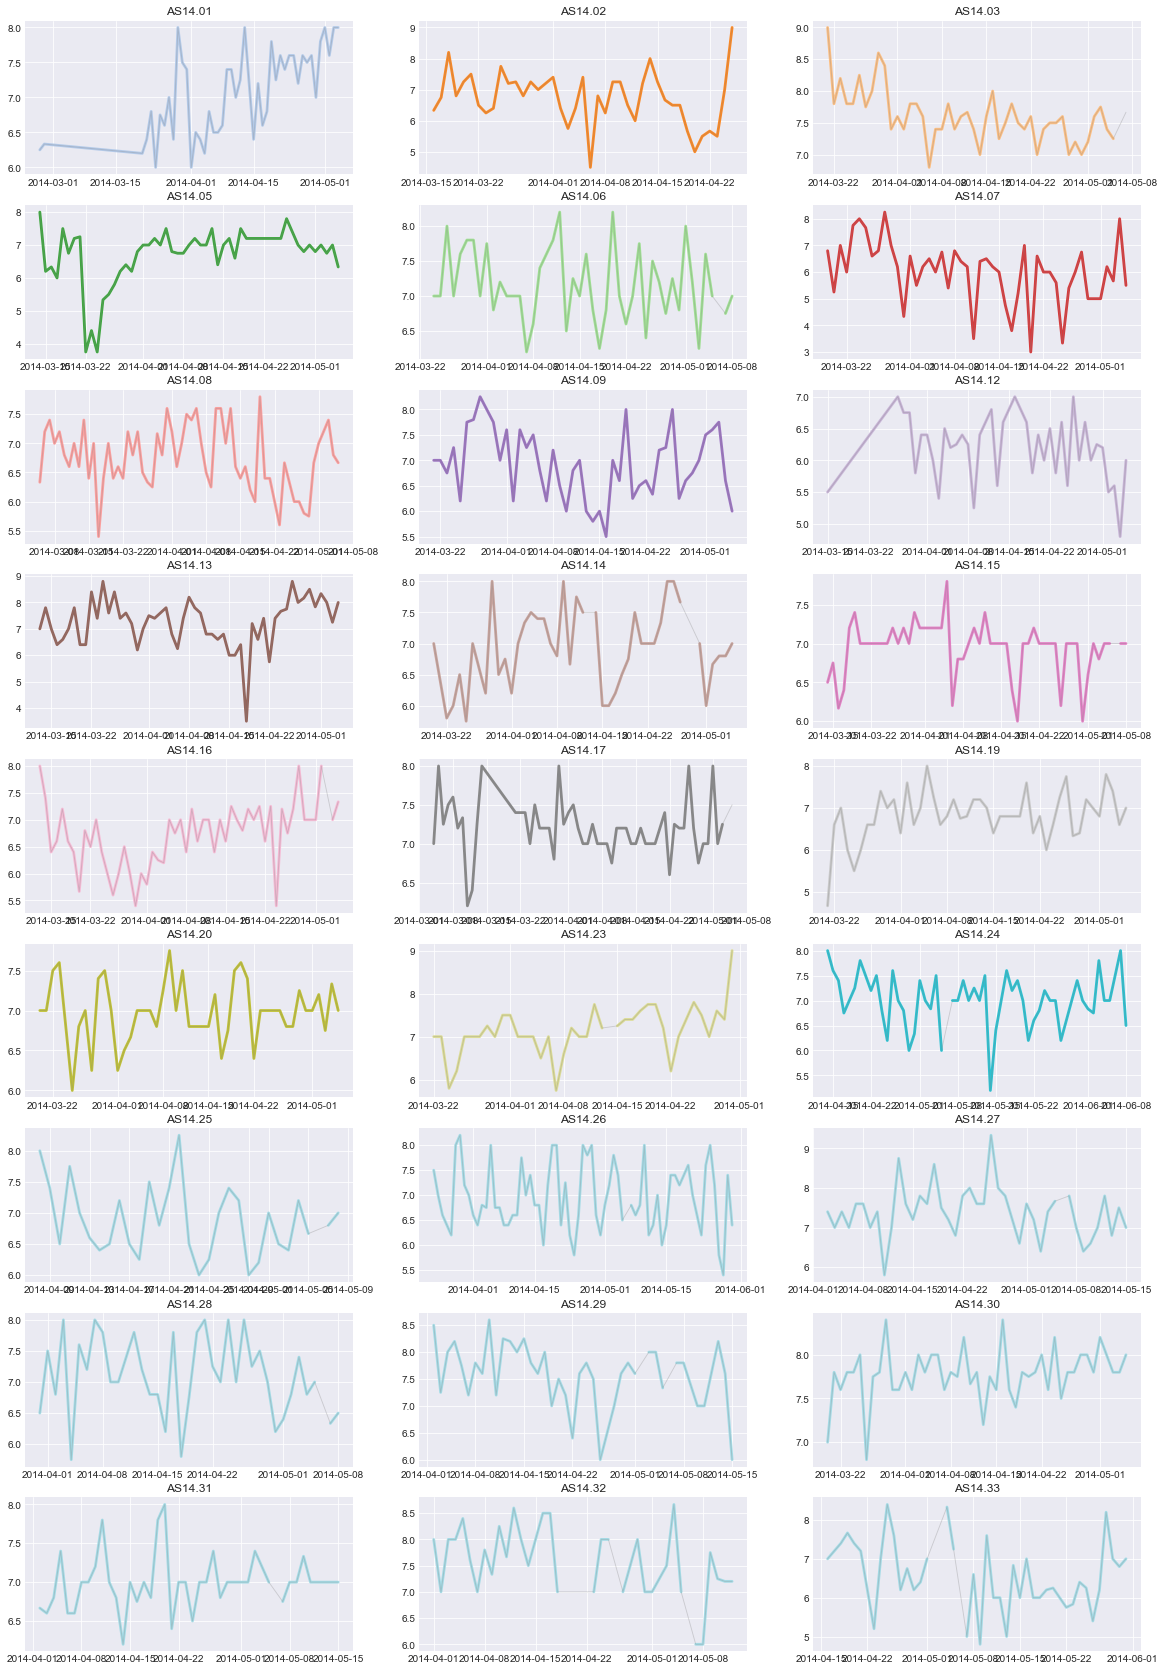

In [16]:
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('tab20')

f = plt.figure(figsize=(20,30))
num=0
for i in list(df.index.levels[0]):
    num+=1
    ax = f.add_subplot(9,3, num)
    ax.set_title(i)
    ax.plot(df.loc[i,'mood'], marker='', color=palette(num), linewidth=2.8, alpha=0.9, label=i)
    ax.plot(df_inter.loc[i,'mood'], marker='', color='grey', linewidth=0.9, alpha=0.3)

#### Delete separate days
Some participants have one or two values for 'mood' and then don't report for a long time, these separate values are dropped because they can not be used in the analysis.

In [17]:
df = df_inter

In [18]:
df.loc['AS14.12','2014-03-15'] = np.nan
df.loc['AS14.01','2014-02-26'] = np.nan
df.loc['AS14.01','2014-02-27'] = np.nan
df.dropna(subset=['mood'], inplace=True)


In [19]:
#Create this for temporal dataset and benchmark
df_temporal = copy.copy(df)
df_benchmark = copy.copy(df)

#### Correlation matrix

In [20]:
# df_help = df
# df_corr = df_corr.drop(['circumplex.arousal', 'circumplex.valence', 'activity',
#        'screen', 'call', 'sms', 'appCat.communication', 't', 'app.usefull',
#        'app.leisure', 'app.work'], axis=1)
# correlations = abs(highest_corr(df_corr)[1])

# names = correlations.columns
# # plot correlation matrix
# fig = plt.figure(figsize=(10,10))
# ax = fig.add_subplot(111)
# cax = ax.matshow(correlations, vmin=0, vmax=1, cmap='Purples')
# fig.colorbar(cax)
# ticks = range(len(names))
# ax.set_xticks(ticks)
# ax.set_yticks(ticks)
# ax.set_xticklabels(names,rotation='vertical')
# ax.set_yticklabels(names)
# plt.show()



#### Creating three day window for all variables

In [21]:
df_backup = df

In [22]:
df.reset_index(inplace=True)
df.set_index(['ID','time','t'],inplace=True,drop=True)
new_variables = np.array(df.columns[np.arange(0,len(df.columns)).tolist()])

In [23]:
df.reset_index(inplace=True)
df.set_index(['ID','t'],inplace=True,drop=True)
print('This may take a while, right now we finished:')

for var in new_variables:
        df[str(var)+'_3dayavg'] = np.nan

for i in ids:
    for var in new_variables:
        a = df.loc[i].index
        for j in np.arange(3,len(a)):
            df.loc[i,str(var)+'_3dayavg'][a[j]] = (df.loc[i,var][a[j-1]]+df.loc[i,var][a[j-2]]+df.loc[i,var][a[j-3]])/3            
            
    print('Participant: ',i)

This may take a while, right now we finished:


//anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3325: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


Participant:  AS14.01
Participant:  AS14.02
Participant:  AS14.03
Participant:  AS14.05
Participant:  AS14.06
Participant:  AS14.07
Participant:  AS14.08
Participant:  AS14.09
Participant:  AS14.12
Participant:  AS14.13
Participant:  AS14.14
Participant:  AS14.15
Participant:  AS14.16
Participant:  AS14.17
Participant:  AS14.19
Participant:  AS14.20
Participant:  AS14.23
Participant:  AS14.24
Participant:  AS14.25
Participant:  AS14.26
Participant:  AS14.27
Participant:  AS14.28
Participant:  AS14.29
Participant:  AS14.30
Participant:  AS14.31
Participant:  AS14.32
Participant:  AS14.33


In [24]:
#Drop old variables
df = df.drop(df.columns[np.arange(2,len(new_variables)+1)], axis=1)

###### Weekend dummy

In [25]:
df.reset_index(inplace=True)
df.set_index(['ID','time'],inplace=True,drop=True)
pd.options.mode.chained_assignment = None
df['weekend'] = 0
days = df.index.get_level_values(1).weekday
for i in range(len(df)):
    if days[i] == 5 or days[i] == 6:
        df['weekend'][i] = 1

In [26]:
df_backup = df

#### Data normalization

In [27]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler

df_scale = df
df_scale.reset_index(inplace=True)
df_scale.set_index(['ID','time','t'],inplace=True,drop=True)

minmaxscaler = MinMaxScaler()
for i in ids:
    df_scale.loc[i] = minmaxscaler.fit_transform(df_scale.loc[i])

In [28]:
df = df_scale

In [29]:
df.to_csv('df_nontemporal.csv')

#### Benchmark

In [30]:
df_bench = df_benchmark
minmaxscaler = MinMaxScaler()
for i in ids:
    df_bench.loc[i] = minmaxscaler.fit_transform(df_bench.loc[i])
    
df_benchmark = df_bench

#df_bench.reset_index(inplace=True)
#df_bench.set_index(['ID','time','t'],inplace=True,drop=True)

df_benchmark['pred'] = np.nan

for i in ids:
        a = df_benchmark.loc[i].index
        for j in np.arange(1,len(a)):
            df_benchmark.loc[i,'pred'][a[j]] = df_benchmark.loc[i,'mood'][a[j-1]]            
            
df_benchmark = df_benchmark[['mood','pred']]
df_benchmark.dropna(inplace=True)

t_test = np.array(df_benchmark['mood'])
t_pred = np.array(df_benchmark['pred'])

In [31]:
# df_bench = df_benchmark
# df_bench.reset_index(inplace=True)
# df_bench.set_index(['ID','time','t'],inplace=True,drop=True)

# minmaxscaler = MinMaxScaler()
# for i in ids:
#     df_bench.loc[i] = minmaxscaler.fit_transform(df_bench.loc[i])
    
# df_benchmark = df_bench

# #df_bench.reset_index(inplace=True)
# #df_bench.set_index(['ID','time','t'],inplace=True,drop=True)

# df_benchmark['pred'] = np.nan

# for i in ids:
#         a = df_benchmark.loc[i].index
#         for j in np.arange(1,len(a)):
#             df_benchmark.loc[i,'pred'][a[j]] = df_benchmark.loc[i,'mood'][a[j-1]]            
            
# df_benchmark = df_benchmark[['mood','pred']]
# df_benchmark.dropna(inplace=True)

# t_test = np.array(df_benchmark['mood'])
# t_pred = np.array(df_benchmark['pred'])

In [32]:
from sklearn.metrics import mean_squared_error
MSE=mean_squared_error(t_test,t_pred)
print(MSE)

0.0700747079372759


#### Preprocess the extra dataset for RNN

In [33]:
df_temporal.reset_index(drop=False,inplace=True)
df_temporal.set_index(['ID','time'],inplace=True)
minmaxscaler = MinMaxScaler()
#create new t column for temporal
for i in ids:
        df_temporal.loc[i] = minmaxscaler.fit_transform(df_temporal.loc[i])
        a = df_temporal.loc[i].index
        for j in np.arange(0,len(a)):
            df_temporal.loc[i,'t'][a[j]] = j+1

#Add weekend dummy
pd.options.mode.chained_assignment = None
df_temporal['weekend'] = 0
days = df_temporal.index.get_level_values(1).weekday
for i in range(len(df_temporal)):
    if days[i] == 5 or days[i] == 6:
        df_temporal['weekend'][i] = 1
            
df_temporal.reset_index(drop=False,inplace=True)            

In [34]:
df_temporal.to_csv('df_temporal.csv')

In [2]:
import pandas as pd
full_predictions = pd.DataFrame(srch_id=ouble(),prop_id=double())
helpme = pd.DataFrame(srch_id=1,prop_id=2)

NameError: name 'double' is not defined